# Velocity field analysis 

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import time
import os.path
import json
DIR  = 'C:/Users/Antoine/Documents/Etudes/Master CSE/PDM/data/' #On laptop
#DIR  = 'D:/pdm_data/'
FDIR = '../report/Figures/'
extension =  '.pdf'

UREF = 4.6E-06
TREF = 2.92E+01

def Save_data(MP_dict, filename) :
    #Copy data into non np array dict for json formating
    No_np = {}
    for key in MP_dict : No_np[key] = [v for v in MP_dict[key]]
    with open(filename, 'w') as outfile:  
        json.dump(No_np, outfile)

In [3]:
N    = 1000
if os.path.isfile(DIR+'Bentheimer'+str(N)+'/Ux.dat') :
    ux   = np.loadtxt(DIR+'Bentheimer'+str(N)+'/Ux.dat')
    #uy   = np.loadtxt(DIR+'Bentheimer'+str(N)+'/Uy.dat')
    #uz   = np.loadtxt(DIR+'Bentheimer'+str(N)+'/Uz.dat')

In [39]:
uxmean = ux.mean()/UREF
uymean = uy.mean()/UREF
uzmean = uz.mean()/UREF
print ( 'Shape : ' + str(ux.shape))
print ( 'Overall Means : ux = '+str(uxmean)+ ', uy = '+str(uymean)+', uz = '+str(uzmean))

Shape : (1000000, 1000)
Overall Means : ux = 0.21768897590316222, uy = -0.005887786724673166, uz = -0.002388719529074965


In [ ]:
phi = 0.2
uux = ux.reshape(N**3)
uuy = uy.reshape(N**3)
uuz = uz.reshape(N**3)
Uxmean = Uymean = Uzmean = 0
for (i2,i3) in zip(range(N),range(N)) :
    i1 = 0
    Uxmean += uux[N**2*i3 + N*i2 + i1]
    Uymean += uuy[N**2*i3 + N*i2 + i1]
    Uzmean += uuz[N**2*i3 + N*i2 + i1]
Uxmean /= (N**2)/phi
Uymean /= (N**2)/phi
Uzmean /= (N**2)/phi
print ( 'Inlet Means : ux = '+str(Uxmean)+ ', uy = '+str(Uymean)+', uz = '+str(Uzmean))

In [58]:
print(Uxmean)
Save_data({'Fortran':[Uxmean, Uymean, Uzmean]},DIR+'Processed_data/UMEAN.dat')

5.097504174127219


### Eulerian x,y,z velocity PDF

In [17]:
def Extract_pdf(data_, nbins = 500, dst = True) :
    pdf_ = np.histogram(data_, bins = nbins, density = dst);
    pdf_ = np.array([pdf_[1][0:-1], pdf_[0]])
    return pdf_

uxpdf = Extract_pdf(ux.reshape(N**3)/UREF,50)

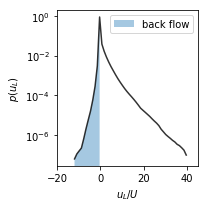

In [52]:
NBINS=100
plt.figure(figsize=(3,3))
plt.fill_between(uxpdf[0][:12],0, uxpdf[1][:12],alpha=0.4, label = 'back flow');
plt.plot(uxpdf[0], uxpdf[1],'k',alpha=0.8);
plt.yscale('log')
plt.ylabel(r'$p(u_L)$')
plt.xlabel(r'$u_L/U$')
plt.xlim([-20, 45])
plt.tight_layout()
plt.legend()
plt.savefig(FDIR + 'ul_eulerian_hist.pdf')
plt.savefig(FDIR + 'ul_eulerian_hist.png')

Text(0.5, 0, '$u/U$')

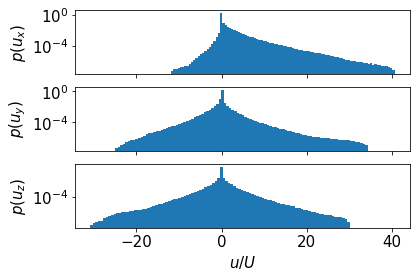

In [59]:
#UY
axs[1].hist(uy.reshape(N**3)/UREF, bins = NBINS, density = True, log = True);
axs[1].set_ylabel(r'$p(u_y)$')
#UZ
axs[2].hist(uz.reshape(N**3)/UREF, bins = NBINS, density = True, log = True);
axs[2].set_ylabel(r'$p(u_z)$')
axs[2].set_xlabel(r'$u/U$')

### Eulerian log velocity magnitude

In [42]:
Vm = np.sqrt(ux*ux + uy*uy + uz*uz)/UREF
Vm = Vm.reshape(N*N*N);
Vm_min=min(Vm)
Vm_max=max(Vm)
print(str(Vm.shape)+', Vm min = '+str(Vm_min)+', Vm max = '+str(Vm_max))

(1000000000,), Vm min = 0.0, Vm max = 43.58510436477335


In [43]:
NBINS=100
#Ui histograms
'''
fig, ax = plt.subplots(1,1)
ax.hist((ux.reshape(N*N*N)/U), bins = NBINS, normed = True, alpha = 0.5);
ax.hist((uy.reshape(N*N*N)/U), bins = NBINS, normed = True, alpha = 0.5);
ax.hist((uz.reshape(N*N*N)/U), bins = NBINS, normed = True, alpha = 0.5);
'''

#Log velocity magnitude
logVm = [np.log(v_) for v_ in Vm if v_ > 0]

Text(0.5, 0, '$v_e$')

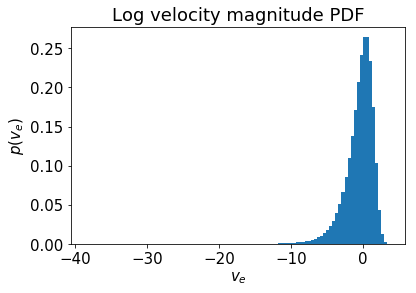

In [44]:
fig, ax = plt.subplots(1,1)
hist=ax.hist(logVm, bins = NBINS,  density = True, log = False)
ax.set_title('Log velocity magnitude PDF')
ax.set_ylabel(r'$p(v_e)$')
ax.set_xlabel(r'$v_e$')

In [45]:
def Extract_pdf(data_, nbins = 500, dst = True) :
    pdf_ = np.histogram(data_, bins = nbins, density = dst);
    pdf_ = np.array([pdf_[1][0:-1], pdf_[0]])
    return pdf_
def Save_pdf(pdf_dict, filename) :
    #Copy data into non np array dict for json formating
    x = {}
    y = {}
    for key in pdf_dict : x[key] = [v for v in pdf_dict[key][0]]
    for key in pdf_dict : y[key] = [v for v in pdf_dict[key][1]]
    with open(filename, 'w') as outfile:  
        json.dump([x,y], outfile)

In [46]:
lvmpdf = Extract_pdf(logVm)

Text(0.5, 0, '$v_e$')

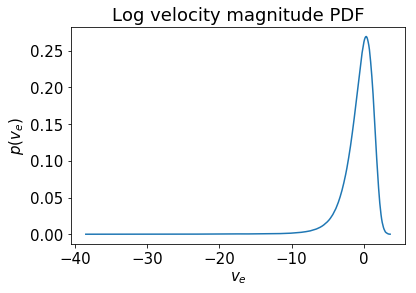

In [60]:
fig, ax = plt.subplots(1,1)
ax.plot(lvmpdf[0], lvmpdf[1])
ax.set_title('Log velocity magnitude PDF')
ax.set_ylabel(r'$p(v_e)$')
ax.set_xlabel(r'$v_e$')

In [61]:
print('Saving log velocity magnitude PDF..')
tosave = {'Bentheimer1000' : lvmpdf }
fname  =  DIR+'Processed_data/bentheimer1000lvmpdf.dat'
Save_pdf(tosave,fname)
print('done.')

Saving log velocity magnitude PDF..
done.


 ## Geometry analysis

In [3]:
N       = 300
voxels_ = np.loadtxt(DIR+'Bentheimer'+str(N)+'/voxelMesh.dat')

In [4]:
np.shape(voxels_)
voxels3D = np.array(voxels_.reshape(N,N,N), dtype=bool)

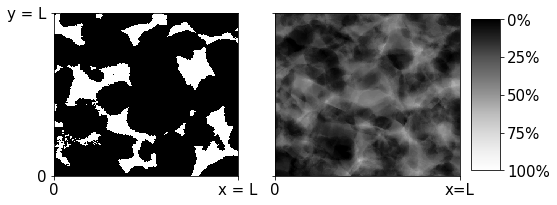

In [29]:
x_    = np.linspace(0,1,N)
[X,Y] = np.meshgrid(x_,x_)

fig, axs = plt.subplots(1,2, figsize = (8,3.0), sharey = True)
n_ = int(np.floor(N/4))
for i in range(0,1) :
    ax = axs[i]
    ax.pcolormesh(X,Y,voxels3D[(i+1)*n_,:,:],cmap='Greys');
    ax.set_xlim([0,1]);
    ax.set_ylim([0,1]);
    ax.set_xticks([0,1])
    ax.set_xticklabels(['0','x = L'])
    ax.set_yticks([0,1])
    ax.set_yticklabels(['0','y = L'])
aggregated_ = np.zeros((N,N))
for i in range(N) : aggregated_ += 1.0/N * voxels3D[i,:,:]
ax = axs[-1]
im = ax.pcolormesh(X,Y,aggregated_,cmap='Greys');
im.set_clim([0,1])

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.set_yticklabels(['100%', '75%','50%' ,'25%', '0%'])  # vertically oriented colorbar
ax.set_xlim([0,1]);
ax.set_ylim([0,1]);
ax.set_xticks([0,1])
ax.set_xticklabels(['0','x=L'])
#plt.tight_layout()
plt.rcParams.update({'font.size': 15})
plt.savefig(FDIR+'bentheimer300_cuts.png')